# Visualizations

This notebook's purpose is to provide exploratory and explanatory data analysis of the dataset prior to any processing for machine learning.

## Library Importation, Folder Creation and Function Implementation

In [1]:
#Importing numpy and pandas for basic data manipulation
import numpy as np
import pandas as pd

#importing os for operating system interfacing
import os

#Importing matplotlib and seaborn for basic data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Creating new folder for visuals
vis_folder = "Visualizations/"
os.makedirs(vis_folder, exist_ok=True)
os.listdir(vis_folder)

[]

In [3]:
df = pd.read_csv("Data/tmdb_data.csv.gz", lineterminator = "\n")
df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.119,2204.0,PG


### Functions
Various functions to assist in visualizations

## Preliminary Data Cleaning

This part of the notebook is meant to determine which columns/rows to drop if too much data is missing. All duplicates have been dropped in a prior notebook.

In [4]:
df.shape

(62809, 25)

In [5]:
#Checking for missing values
df.isna().sum()

adult                        1
backdrop_path            22291
belongs_to_collection    58600
budget                       1
genres                       1
homepage                 47721
id                           1
original_language            1
original_title               1
overview                  1337
popularity                   1
poster_path               4904
production_companies         1
production_countries         1
release_date               953
revenue                      1
runtime                      1
spoken_languages             1
status                       1
tagline                  38870
title                        1
video                        1
vote_average                 1
vote_count                   1
certification            47627
dtype: int64

In [6]:
#Checking for missing values by percentage
df.isna().sum()/len(df)* 100

adult                     0.001592
backdrop_path            35.490137
belongs_to_collection    93.298731
budget                    0.001592
genres                    0.001592
homepage                 75.977965
id                        0.001592
original_language         0.001592
original_title            0.001592
overview                  2.128676
popularity                0.001592
poster_path               7.807798
production_companies      0.001592
production_countries      0.001592
release_date              1.517298
revenue                   0.001592
runtime                   0.001592
spoken_languages          0.001592
status                    0.001592
tagline                  61.886035
title                     0.001592
video                     0.001592
vote_average              0.001592
vote_count                0.001592
certification            75.828305
dtype: float64

In [7]:
# Dropping "adult" column to see if that resolves majority of issues 
df = df.dropna(subset = "adult")

df.isna().sum()/len(df)*100

adult                     0.000000
backdrop_path            35.489110
belongs_to_collection    93.298624
budget                    0.000000
genres                    0.000000
homepage                 75.977582
id                        0.000000
original_language         0.000000
original_title            0.000000
overview                  2.127118
popularity                0.000000
poster_path               7.806330
production_companies      0.000000
production_countries      0.000000
release_date              1.515730
revenue                   0.000000
runtime                   0.000000
spoken_languages          0.000000
status                    0.000000
tagline                  61.885429
title                     0.000000
video                     0.000000
vote_average              0.000000
vote_count                0.000000
certification            75.827920
dtype: float64

The vast majority of movies do not belong to a collection or have a homepage. We will remove those columns. Backdrop_path is the path to the "backdrop" of a movie and can also be removed safely. 

Certification (G, PG, PG-13, etc.) will be kept for now, but all missing values will be input as "missing"

ID is also removed since those are unique floats relevant to movies.

In [8]:
df = df.drop(columns = ["backdrop_path", "belongs_to_collection", "homepage", "id"])

df.isna().sum()/len(df)*100

adult                    0.000000
budget                   0.000000
genres                   0.000000
id                       0.000000
original_language        0.000000
original_title           0.000000
overview                 2.127118
popularity               0.000000
poster_path              7.806330
production_companies     0.000000
production_countries     0.000000
release_date             1.515730
revenue                  0.000000
runtime                  0.000000
spoken_languages         0.000000
status                   0.000000
tagline                 61.885429
title                    0.000000
video                    0.000000
vote_average             0.000000
vote_count               0.000000
certification           75.827920
dtype: float64

In [34]:
df["certification"].value_counts()

R          3309
PG-13      2046
NR         1050
PG          820
G           164
NC-17        36
PG-13         1
Unrated       1
Name: certification, dtype: int64

In [37]:
df["certification"] = df["certification"].replace({"PG-13 ": "PG-13"})
df["certification"].value_counts()

R          3309
PG-13      2047
NR         1050
PG          820
G           164
NC-17        36
Unrated       1
Name: certification, dtype: int64

In [9]:
df.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,62808.000000,6.280800e+04,6.280800e+04,62808.000000,6.280800e+04,62808.000000,62808.000000,62808.000000,62808.000000
mean,0.001783,3.055730e+06,3.783050e+05,4.258005,8.033802e+06,91.956837,0.007786,4.607753,218.048131
std,0.042191,1.603919e+07,2.669403e+05,9.521807,6.004472e+07,30.928804,0.087893,2.624601,1159.871579
min,0.000000,0.000000e+00,1.200000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,1.265672e+05,0.682000,0.000000e+00,84.000000,0.000000,3.200000,1.000000
50%,0.000000,0.000000e+00,3.653735e+05,1.590000,0.000000e+00,93.000000,0.000000,5.470000,6.000000
75%,0.000000,0.000000e+00,5.729340e+05,4.469000,0.000000e+00,105.000000,0.000000,6.415000,35.000000
max,1.000000,5.793304e+08,1.127833e+06,879.202000,2.923706e+09,1440.000000,1.000000,10.000000,33679.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62808 entries, 1 to 62808
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 62808 non-null  float64
 1   budget                62808 non-null  float64
 2   genres                62808 non-null  object 
 3   id                    62808 non-null  float64
 4   original_language     62808 non-null  object 
 5   original_title        62808 non-null  object 
 6   overview              61472 non-null  object 
 7   popularity            62808 non-null  float64
 8   poster_path           57905 non-null  object 
 9   production_companies  62808 non-null  object 
 10  production_countries  62808 non-null  object 
 11  release_date          61856 non-null  object 
 12  revenue               62808 non-null  float64
 13  runtime               62808 non-null  float64
 14  spoken_languages      62808 non-null  object 
 15  status             

## Exploratory Data Analysis

Predominantly univariate analyses of various features. ID is not analyzed due to being a unique value.

<AxesSubplot: xlabel='adult', ylabel='Count'>

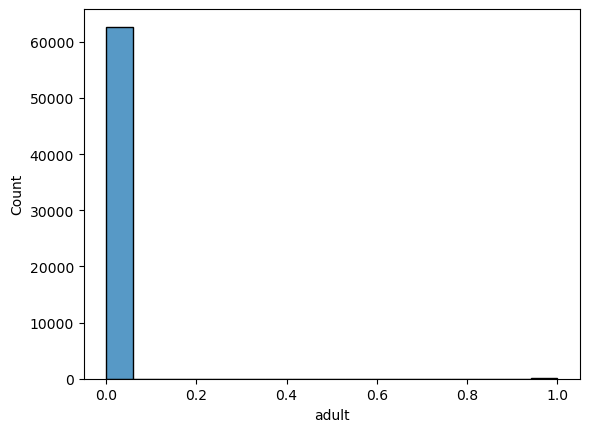

In [10]:
sns.histplot(data = df, x = "adult")

<AxesSubplot: xlabel='budget', ylabel='Count'>

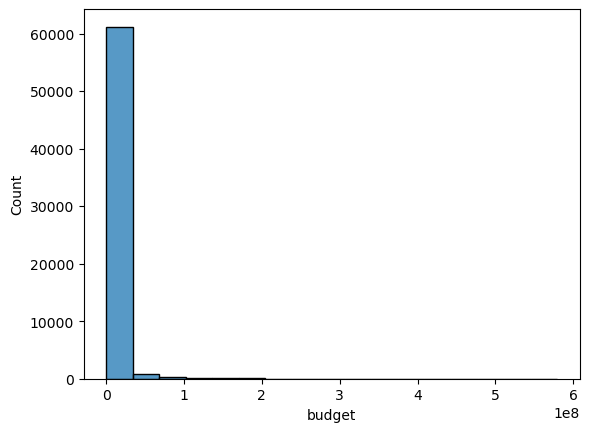

In [11]:
sns.histplot(data = df, x = "budget")

<AxesSubplot: xlabel='popularity', ylabel='Count'>

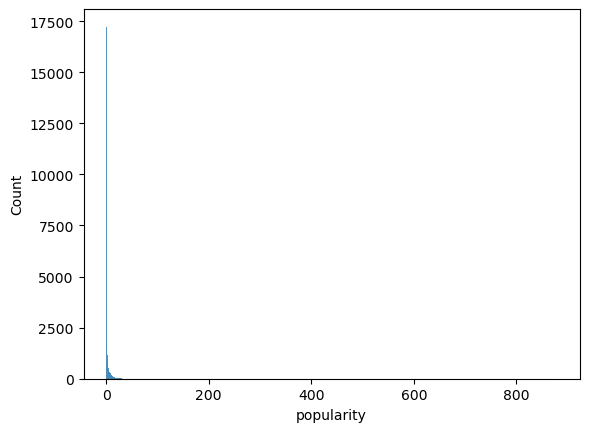

In [12]:
sns.histplot(data = df, x = "popularity")

<AxesSubplot: xlabel='revenue', ylabel='Count'>

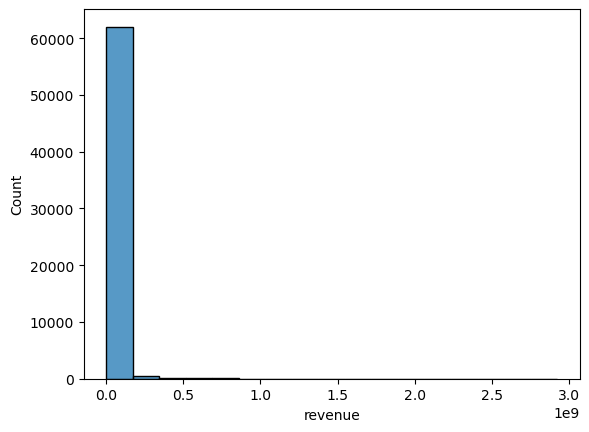

In [13]:
sns.histplot(data = df, x = "revenue")

<AxesSubplot: xlabel='runtime', ylabel='Count'>

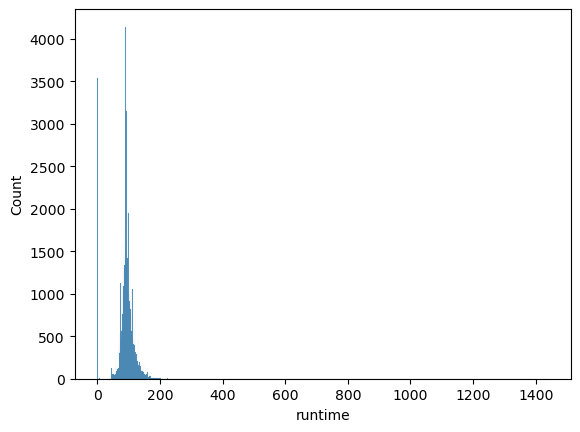

In [14]:
sns.histplot(data = df, x = "runtime")

<AxesSubplot: xlabel='video', ylabel='Count'>

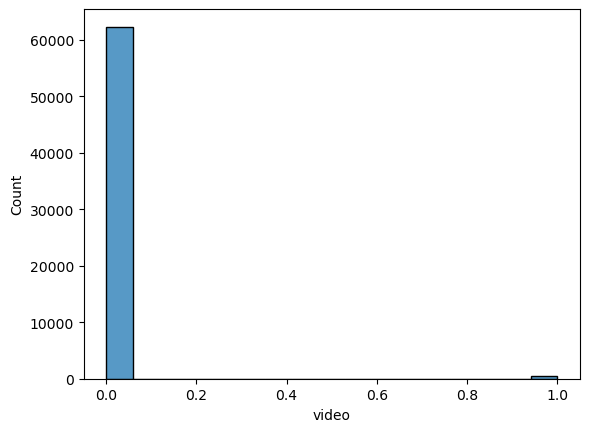

In [15]:
sns.histplot(data = df, x = "video")

<AxesSubplot: xlabel='vote_average', ylabel='Count'>

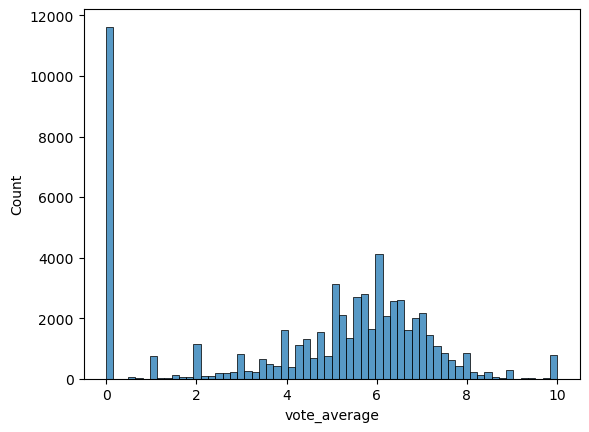

In [16]:
sns.histplot(data = df, x = "vote_average")

<AxesSubplot: xlabel='vote_count', ylabel='Count'>

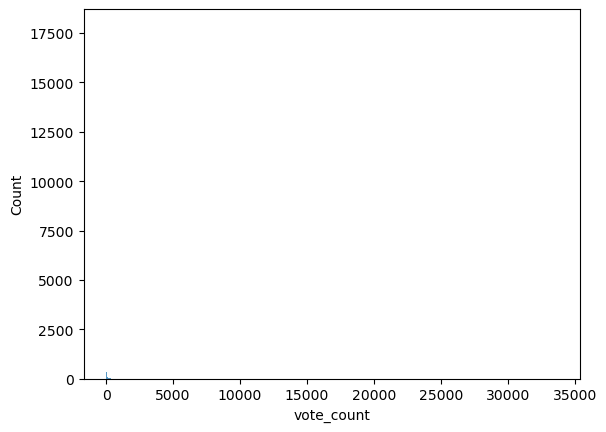

In [18]:
sns.histplot(data = df, x = "vote_count")

<AxesSubplot: >

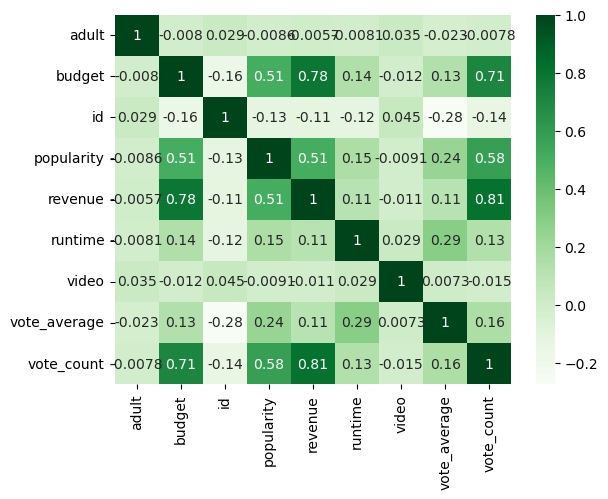

In [22]:
corr = df.corr(numeric_only = True)

sns.heatmap(corr, cmap = 'Greens', annot = True)

## Explanatory Data Analysis

Predominantly multivariate analyses

How many movies had at least some valid financial information (values > 0 for budget OR revenue

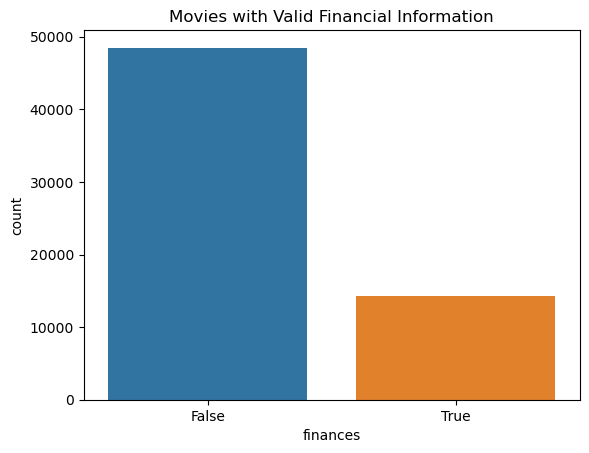

In [27]:
df["finances"] = (df["budget"] > 0) | (df["revenue"] > 0)

sns.countplot(data = df, x = "finances").set(title = "Movies that have financial information");

A large amount of movies do not have any budget or revenue information. 

Removing all non-financial data from dataframe

In [30]:
df.drop(df.loc[df["finances"] == False].index, inplace=True)

df["finances"].value_counts()

True    14316
Name: finances, dtype: int64

[Text(0.5, 1.0, 'Movie Count by Certification')]

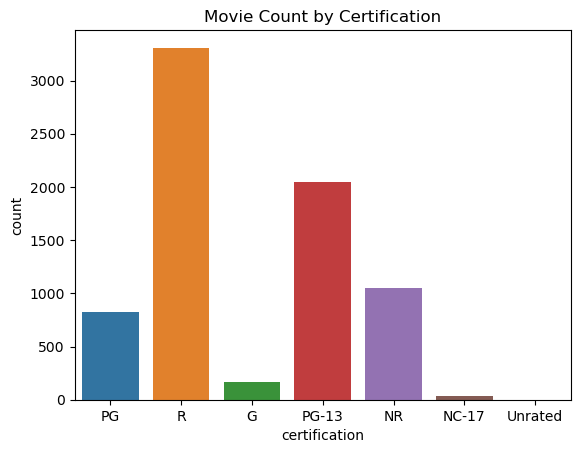

In [38]:
sns.countplot(data = df, x = "certification").set(title = "Movie Count by Certification")

There are more R rated movies than PG-13 movies, which in turn have greater number than PG rated movies, which also have greater numbers than G rated movies.

[Text(0.5, 1.0, 'Revenue by Certification')]

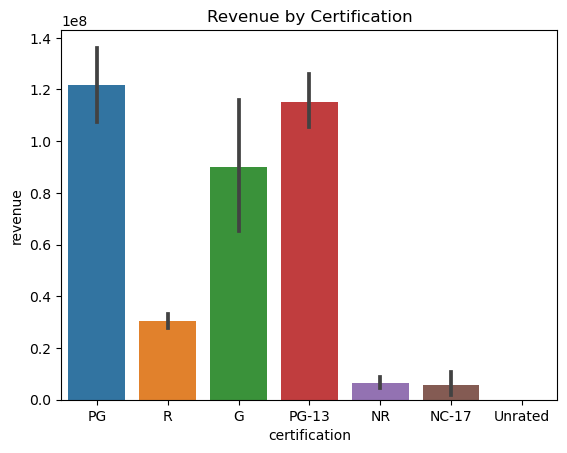

In [39]:
sns.barplot(data = df, x = 'certification', y = 'revenue').set(title = "Revenue by Certification")

PG rated movies tend to have higher revenue than PG-13 movies, followed by G rated movies, and after that, R rated movies.

[Text(0.5, 1.0, 'Budget by Certification')]

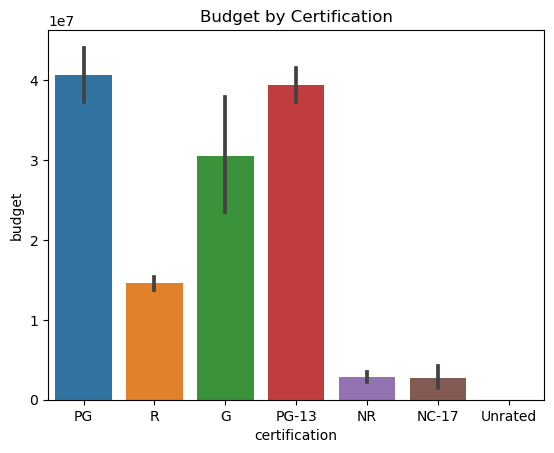

In [40]:
sns.barplot(data = df, x = 'certification', y = 'budget').set(title = "Budget by Certification")

On Average, PG and PG-13 movies get the most budget, followed by G and R rated movies.